In [ ]:
from os.path import join
from google.colab import drive
 
ROOT = "/content/drive"
drive.mount(ROOT)
 
PROJ = "My Drive/currency_project" # This is a custom path.
PROJECT_PATH = join(ROOT, PROJ)
 
%cd ~/content
%cd drive/My Drive/currency_project

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
[Errno 2] No such file or directory: '/root/content'
/content
/content/drive/My Drive/currency_project


In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

import os
import numpy as np
import matplotlib.pyplot as plt
tf.__version__

'2.2.0'

In [ ]:
IMAGE_SIZE = 300
BATCH_SIZE = 64


datagen = tf.keras.preprocessing.image.ImageDataGenerator(
      
        rotation_range=40,
        width_shift_range=0.2,
         height_shift_range=0.2,
         rescale=1./255,
         shear_range=0.2,
        horizontal_flip=True, vertical_flip=True, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    './dataset',
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE, 
    subset='training')

val_generator = datagen.flow_from_directory(
    './dataset',
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    shuffle=False, 
    subset='validation')

Found 636 images belonging to 11 classes.
Found 154 images belonging to 11 classes.


In [ ]:
for image_batch, label_batch in train_generator:
  break
image_batch.shape, label_batch.shape

((64, 300, 300, 3), (64, 11))

In [ ]:
print (train_generator.class_indices)

labels = '\n'.join(sorted(train_generator.class_indices.keys()))

with open('labels.txt', 'w') as f:
  f.write(labels)

{'1': 0, '10': 1, '10 coin': 2, '100': 3, '2': 4, '20': 5, '200': 6, '2000': 7, '5': 8, '50': 9, '500': 10}


In [ ]:
!cat labels.txt

1
10
10 coin
100
2
20
200
2000
5
50
500

In [ ]:
IMG_SHAPE = (IMAGE_SIZE, IMAGE_SIZE, 3)

# Create the base model from the pre-trained model MobileNet V2
base_model = tf.keras.applications.NASNetLarge(input_shape=IMG_SHAPE,
                                              include_top=False, 
                                              weights='imagenet')

ValueError: ignored

In [ ]:
base_model.trainable = False

In [ ]:
x=base_model.output
x=tf.keras.layers.GlobalAveragePooling2D()(x)
x=tf.keras.layers.Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=tf.keras.layers.Dense(1024,activation='relu')(x) #dense layer 2
x=tf.keras.layers.Dense(512,activation='relu')(x) #dense layer 3
preds=tf.keras.layers.Dense(11,activation='softmax')(x)

In [ ]:
model = tf.keras.Model(inputs=base_model.input,outputs=preds)


In [ ]:
print('Number of trainable variables = {}'.format(len(model.trainable_variables)))

Number of trainable variables = 8


In [ ]:

print("Number of layers in the base model: ", len(base_model.layers))


for layer in base_model.layers:
   layer.trainable =  False

for layer in base_model.layers[87:]:
  layer.trainable = True

Number of layers in the base model:  87


In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer = tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 300, 300, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 301, 301, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 150, 150, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 150, 150, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 150, 150, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 150, 150, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 150, 150, 32)      128   

In [ ]:
print('Number of trainable variables = {}'.format(len(model.trainable_variables)))

Number of trainable variables = 8


In [ ]:
history_fine = model.fit_generator(train_generator, 
                         epochs=50,
                         validation_data=val_generator)



Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
10/10 [==============================] - 408s 41s/step - loss: 2.4786 - accuracy: 0.2327 - val_loss: 1.7676 - val_accuracy: 0.4545
Epoch 2/50
10/10 [==============================] - 94s 9s/step - loss: 1.3968 - accuracy: 0.5063 - val_loss: 1.2517 - val_accuracy: 0.5195
Epoch 3/50
10/10 [==============================] - 92s 9s/step - loss: 0.8634 - accuracy: 0.7091 - val_loss: 1.0659 - val_accuracy: 0.5195
Epoch 4/50
10/10 [==============================] - 92s 9s/step - loss: 0.6467 - accuracy: 0.7704 - val_loss: 0.9723 - val_accuracy: 0.6169
Epoch 5/50
10/10 [==============================] - 91s 9s/step - loss: 0.5278 - accuracy: 0.8113 - val_loss: 0.9304 - val_accuracy: 0.6429
Epoch 6/50
10/10 [==============================] - 93s 9s/step - loss: 0.4195 - accuracy: 0.8475 - val_loss: 0.8724 - val_accuracy: 0.6169
Epoch 7/50
10/10 [==============================] - 94s 9s/step - loss: 0.3633 - a

In [ ]:
saved_model_dir = 'save/fine_tuning'
tf.saved_model.save(model, saved_model_dir)

converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)
tflite_model = converter.convert()


with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: save/fine_tuning/assets


In [ ]:
from google.colab import files

files.download('model.tflite')
files.download('labels.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

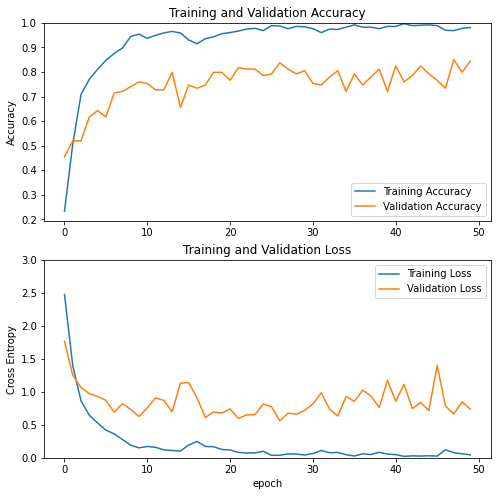

In [ ]:
acc = history_fine.history['accuracy']
val_acc = history_fine.history['val_accuracy']

loss = history_fine.history['loss']
val_loss = history_fine.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,3.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()